# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [11]:
df = pd.read_csv('demo01.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [14]:
df.shape

(16650, 16)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(6770, 16)

In [17]:
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [18]:
df['mau'] = df['mau'].astype(int)

C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mau', ylabel='Count'>

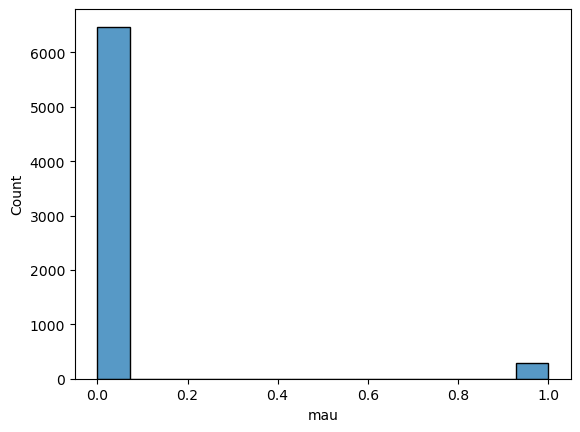

In [27]:
sns.histplot(df['mau'])

In [6]:
var_name = df.columns
metadata = pd.DataFrame({'variáveis':var_name})
metadata

,variáveis
0,sexo
1,posse_de_veiculo
2,posse_de_imovel
3,qtd_filhos
4,tipo_renda
5,educacao
6,estado_civil
7,tipo_residencia
8,idade
9,tempo_emprego


2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [33]:
# Contando valores únicos e convertendo para uma lista
num_cat = df.nunique().tolist()
num_cat

[2, 2, 2, 8, 5, 5, 5, 6, 5298, 3005, 1, 2, 2, 2, 9, 2]

In [37]:
#Criando nova coluna com a quantia de categorias presentes em cada uma das variáveis 
metadata['qtd_categorias'] = num_cat
metadata

,variáveis,qtd_categorias
0,sexo,2
1,posse_de_veiculo,2
2,posse_de_imovel,2
3,qtd_filhos,8
4,tipo_renda,5
5,educacao,5
6,estado_civil,5
7,tipo_residencia,6
8,idade,5298
9,tempo_emprego,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [34]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                        int32
dtype: object

In [42]:
df.posse_de_veiculo = df.posse_de_veiculo.map({'Y':1, 'N':0})

In [43]:
# Identificando as colunas categóricas
cols_categoricas = df.select_dtypes(include=['object']).columns

# Criando as variáveis dummy
df_dummy = pd.get_dummies(df, columns=cols_categoricas, drop_first=True)

df_dummy

,posse_de_veiculo,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,0,58.832877,3.106849,1,0,0,0,2.0,0,...,True,True,False,False,False,True,False,False,False,False
1,0,0,52.356164,8.358904,1,0,1,1,1.0,0,...,True,False,False,True,False,True,False,False,False,False
3,1,0,46.224658,2.106849,1,1,1,1,2.0,0,...,False,True,False,False,False,True,False,False,False,False
4,1,0,29.230137,3.021918,1,0,0,0,2.0,0,...,False,True,False,False,False,True,False,False,False,False
6,0,0,27.482192,4.024658,1,0,1,0,2.0,0,...,True,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,0,1,34.857534,3.101370,1,1,1,0,1.0,1,...,True,False,False,True,False,True,False,False,False,False
16645,0,0,54.109589,9.884932,1,0,0,0,2.0,1,...,True,False,False,False,False,True,False,False,False,False
16646,0,0,43.389041,7.380822,1,1,1,0,2.0,1,...,True,True,False,False,False,True,False,False,False,False
16647,1,0,30.005479,9.800000,1,1,0,0,2.0,1,...,True,True,False,False,False,True,False,False,False,False


In [44]:
df_dummy.dtypes

posse_de_veiculo                            int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int32
sexo_M                                       bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [59]:
df[['possui_email', 'posse_de_veiculo']]

,possui_email,posse_de_veiculo
0,0,1
1,1,0
3,1,1
4,0,1
6,0,0
...,...,...
16644,0,0
16645,0,0
16646,0,0
16647,0,1


In [62]:
tabela_cruzada = pd.crosstab(df['possui_email'], df['posse_de_veiculo'], values=df['mau'], aggfunc='mean')
tabela_cruzada

posse_de_veiculo,0,1
possui_email,,
0,0.046931,0.041255
1,0.024024,0.051724


Clientes sem e-mail e sem veículo têm uma taxa de inadimplência de 4,69%.
Clientes sem e-mail, mas com veículo, têm uma taxa de inadimplência ligeiramente menor (4,13%).
Clientes com e-mail, mas sem veículo, têm a menor taxa de inadimplência (2,40%).
Clientes com e-mail e veículo têm a maior taxa de inadimplência (5,17%).

Com base na observação dessas informações podemos assumir que a variável com mais relevância entre as duas é a 'posse_de_veiculo', por sempre trazer maior percentual onde está presente.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [1]:
df_dummy.to_csv('demo02.csv', index=False)

NameError: name 'df_dummy' is not defined